In [1]:
import pandas as pd

df = pd.read_csv('data/11_final_data_update2.csv')
print(df.head())

    repo_id repo_owner repo_name  project_age  project_size  \
0  17165658     apache     spark    11.054795        489668   
1   4710920     apache     dubbo    12.742466         59474   
2   9185792     apache   echarts    11.953425        245347   
3  33884891     apache   airflow     9.923288        333074   
4  39464018     apache  superset     9.652055        704890   

   total_forks_count                                  annual_forks_list  \
0              25828  [3075, 3600, 3522, 3230, 3187, 2622, 2081, 180...   
1              23141  [1200, 2147, 3446, 3903, 4134, 2965, 1951, 141...   
2              18237  [1418, 1558, 1605, 2196, 3118, 3731, 2260, 123...   
3              14286  [212, 565, 814, 1329, 1812, 1879, 2120, 1992, ...   
4              13813  [15, 899, 1277, 1228, 1300, 1052, 1788, 1638, ...   

   avg_annual_forks_growth_rate  contributed_back_forks_count  \
0                     -0.092254                          1850   
1                      0.018390         

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

In [3]:
from datetime import time
"""
Data Processing
"""

# Deal with empty data

# """
# Option 1: Drop rows with 'Not Apply'
# """
# df = df[df.apply(lambda row: 'Not Apply' not in row.astype(str).values, axis=1)]
# print(f"Row count after dropping 'Not Apply': {len(df)}")


"""
Option 2: Replace with other values
"""
# Replace 'Not Apply' with 0.0 in 'ratio_of_compatibility_issues'
df['ratio_of_compatibility_issues'] = df['ratio_of_compatibility_issues'].replace('Not Apply', 0.0)

# Replace 'Not Apply' with the mean in 'time_taken_to_merge'
df_filtered = df[df['time_taken_to_merge'] != 'Not Apply']
df_filtered['time_taken_to_merge'] = pd.to_numeric(df_filtered['time_taken_to_merge'], errors='coerce')
mean_time_taken_to_merge = df_filtered['time_taken_to_merge'].mean()
df['time_taken_to_merge'] = df['time_taken_to_merge'].replace('Not Apply', mean_time_taken_to_merge)

for col in ['ratio_of_compatibility_issues', 'time_taken_to_merge']:
    df[col] = pd.to_numeric(df[col], errors='coerce')




# Drop all columns that contains lists
df = df.drop(columns=[col for col in df.columns if 'list' in col])

print(df.head())

    repo_id repo_owner repo_name  project_age  project_size  \
0  17165658     apache     spark    11.054795        489668   
1   4710920     apache     dubbo    12.742466         59474   
2   9185792     apache   echarts    11.953425        245347   
3  33884891     apache   airflow     9.923288        333074   
4  39464018     apache  superset     9.652055        704890   

   total_forks_count  avg_annual_forks_growth_rate  \
0              25828                     -0.092254   
1              23141                      0.018390   
2              18237                     -0.045644   
3              14286                      0.342077   
4              13813                      6.700743   

   contributed_back_forks_count  hard_forks_count  inactive_forks_count  \
0                          1850               445                 23251   
1                           713               224                 21549   
2                           254                82                 17789

C:\Users\simon\AppData\Local\Temp\ipykernel_25948\522474216.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['time_taken_to_merge'] = pd.to_numeric(df_filtered['time_taken_to_merge'], errors='coerce')


In [4]:
#df["contributed_back_forks_ratio"] = df["contributed_back_forks_count"] / df["total_forks_count"]
#df["hard_forks_ratio"] = df["hard_forks_count"] / df["total_forks_count"]
#df["inactive_forks_ratio"] = df["inactive_forks_count"] / df["total_forks_count"]

#print(df.head())

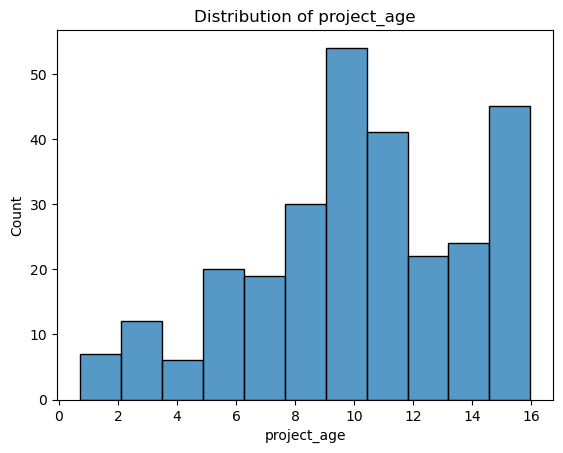

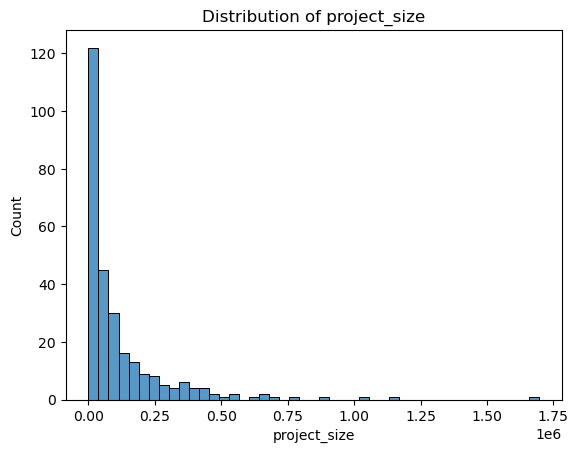

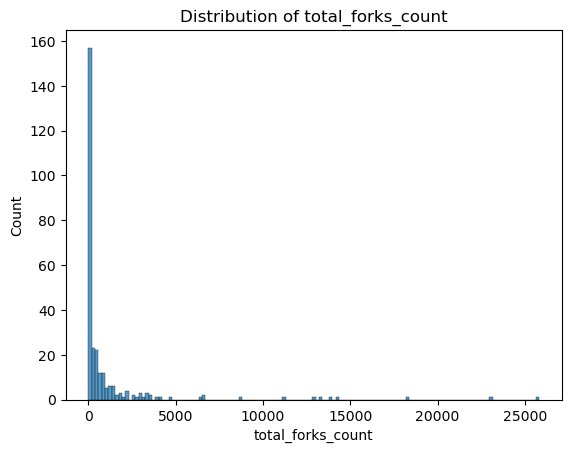

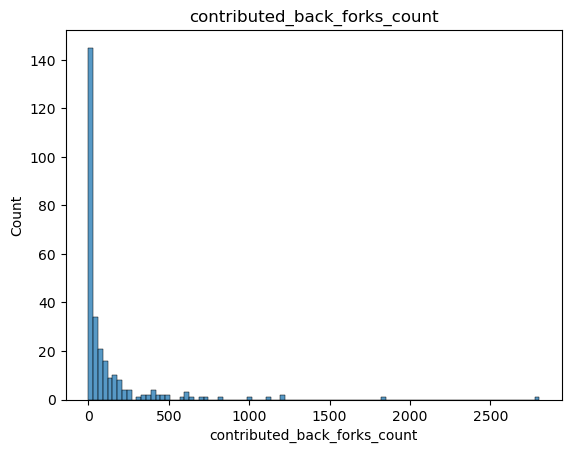

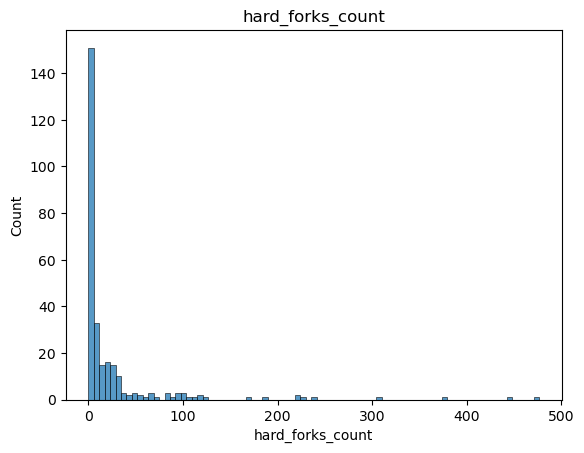

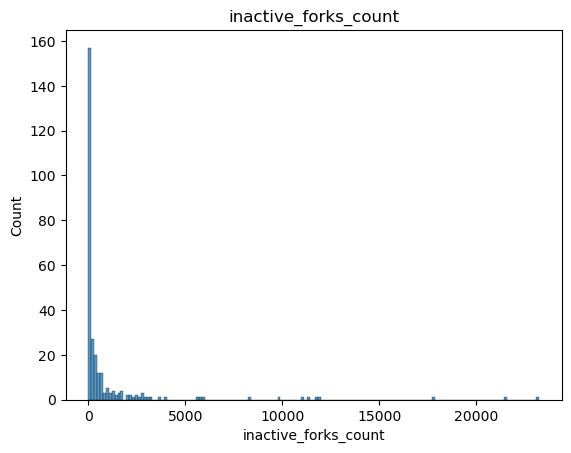

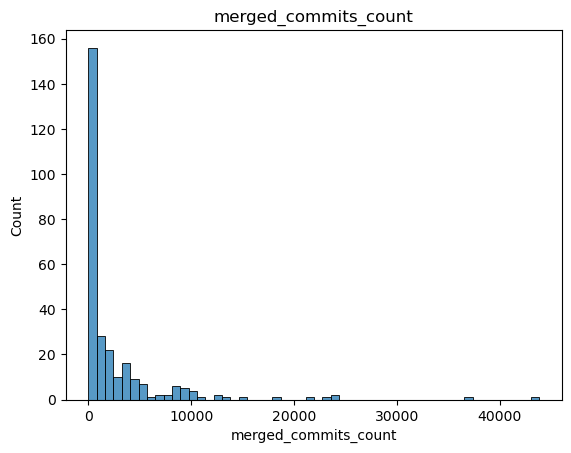

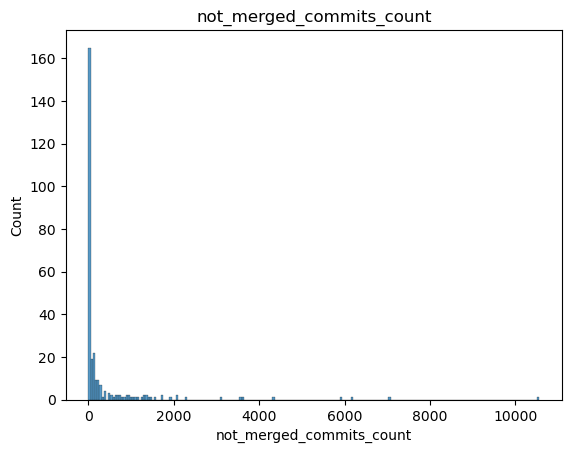

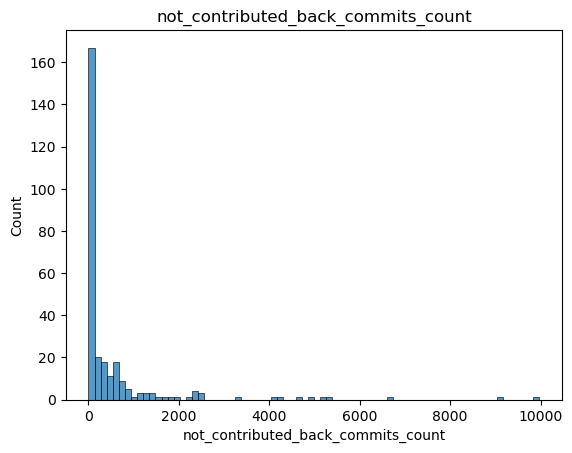

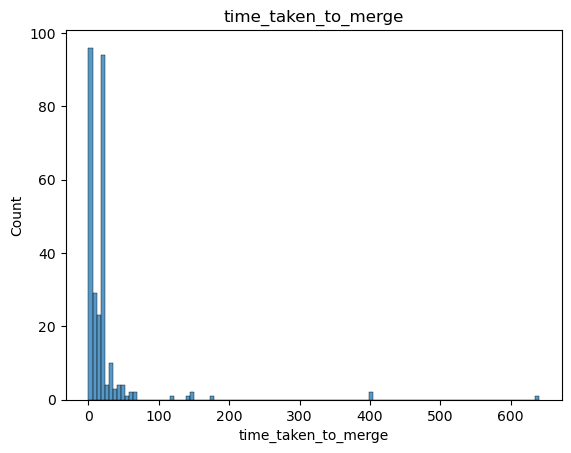

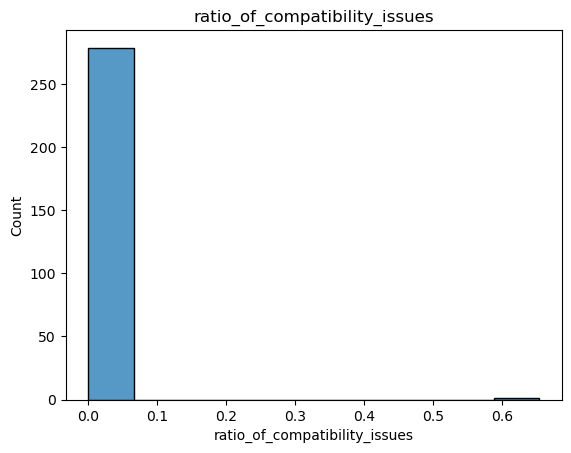

In [5]:
#Check for normality
sns.histplot(df['project_age'])
plt.title("Distribution of project_age")
plt.show()

sns.histplot(df['project_size'])
plt.title("Distribution of project_size")
plt.show()

sns.histplot(df['total_forks_count'])
plt.title("Distribution of total_forks_count")
plt.show()

sns.histplot(df['contributed_back_forks_count'])
plt.title("contributed_back_forks_count")
plt.show()

sns.histplot(df['hard_forks_count'])
plt.title("hard_forks_count")
plt.show()

sns.histplot(df['inactive_forks_count'])
plt.title("inactive_forks_count")
plt.show()

sns.histplot(df['merged_commits_count'])
plt.title("merged_commits_count")
plt.show()

sns.histplot(df['not_merged_commits_count'])
plt.title("not_merged_commits_count")
plt.show()

sns.histplot(df['not_contributed_back_commits_count'])
plt.title("not_contributed_back_commits_count")
plt.show()

sns.histplot(df['time_taken_to_merge'])
plt.title("time_taken_to_merge")
plt.show()

sns.histplot(df['ratio_of_compatibility_issues'])
plt.title("ratio_of_compatibility_issues")
plt.show()

In [6]:
#log the data to ensure a normal distribution
columns_to_exclude = ["repo_id", "repo_owner", "repo_name", "inactive_forks_count", "is_sustaining"]

df_excluded = df[columns_to_exclude]

df_logged = df.drop(columns=columns_to_exclude)

df_logged = df_logged.apply(lambda x: np.log1p(x))

df_logged = pd.concat([df_excluded, df_logged], axis=1)

df_logged = df_logged.drop(columns=['repo_id', 'repo_owner', 'repo_name'])

print(df_logged.head())

   inactive_forks_count  is_sustaining  project_age  project_size  \
0                 23251              1     2.489462     13.101485   
1                 21549              1     2.620491     10.993311   
2                 17789              1     2.561360     12.410433   
3                 11070              1     2.390897     12.716123   
4                 11864              1     2.365753     13.465798   

   total_forks_count  avg_annual_forks_growth_rate  \
0          10.159253                     -0.096791   
1          10.049404                      0.018223   
2           9.811263                     -0.046718   
3           9.567105                      0.294218   
4           9.533438                      2.041317   

   contributed_back_forks_count  hard_forks_count  merged_commits_count  \
0                      7.523481          6.100319             10.032540   
1                      6.570883          5.416100              8.604288   
2                      5.541264    

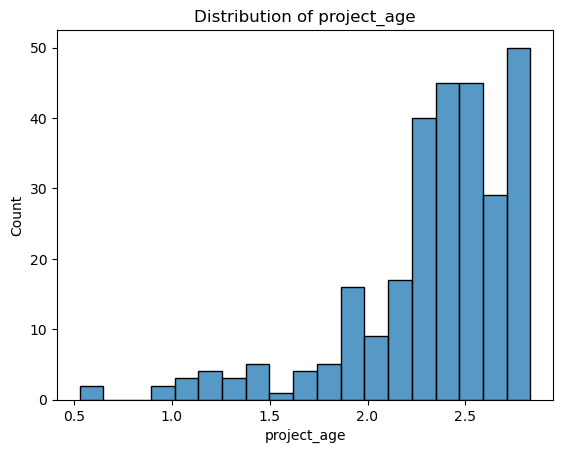

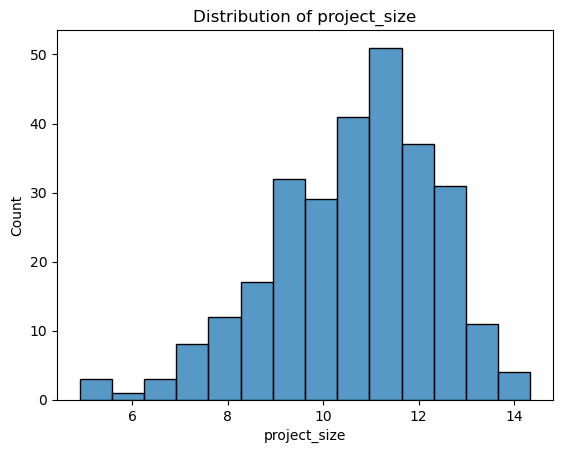

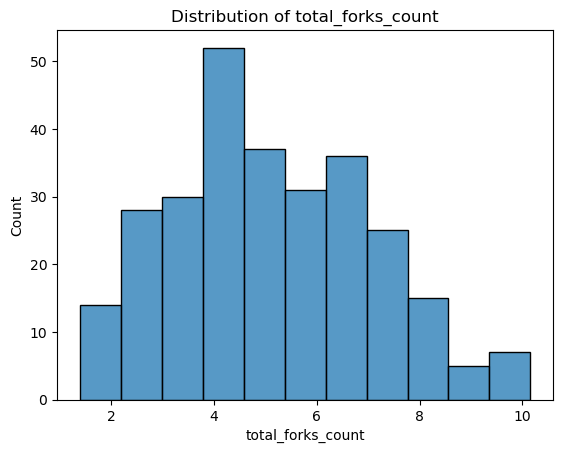

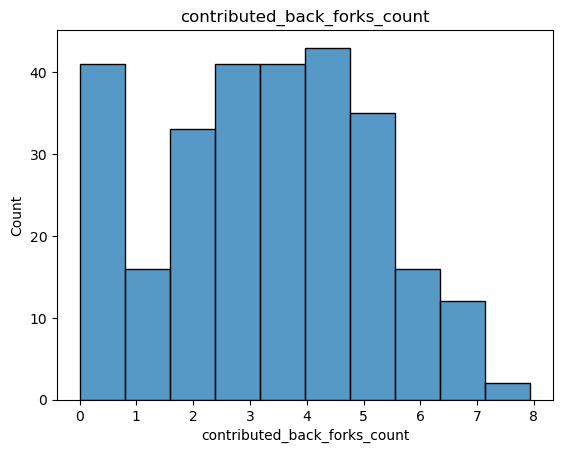

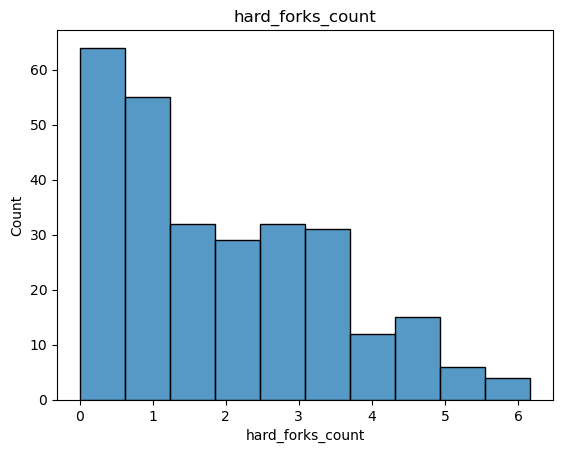

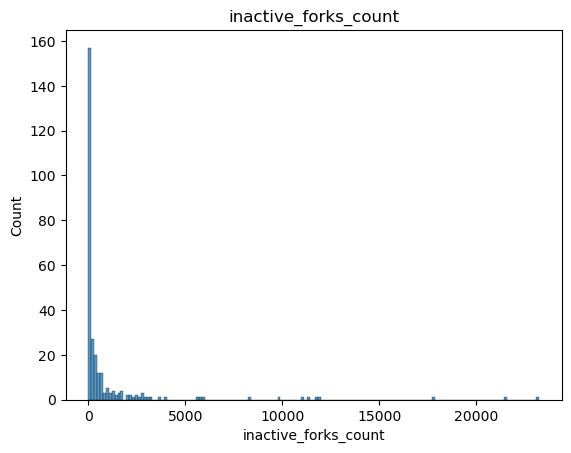

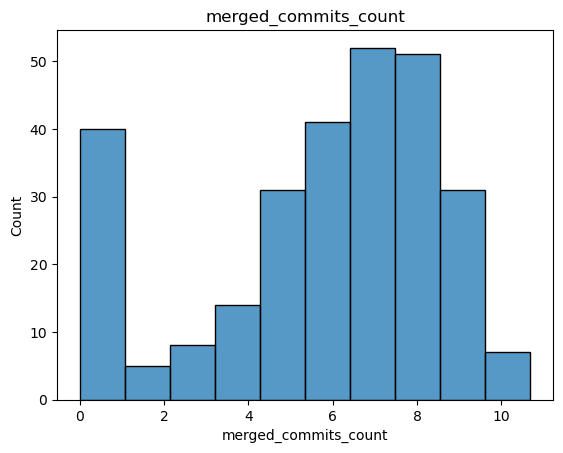

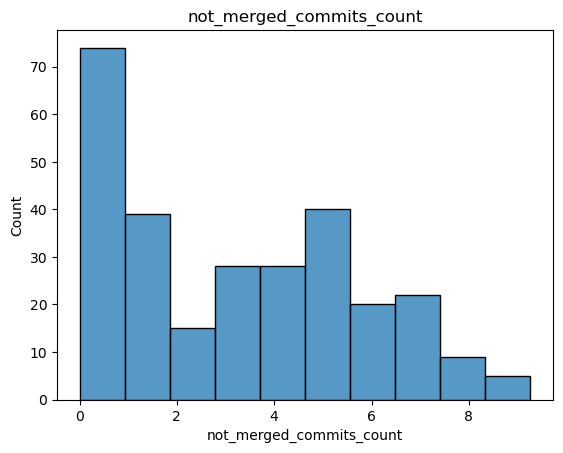

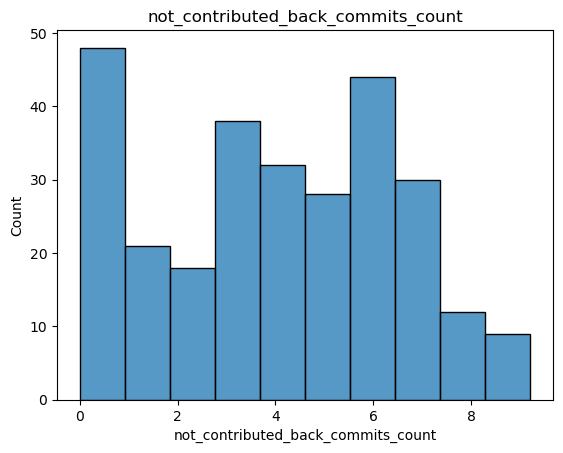

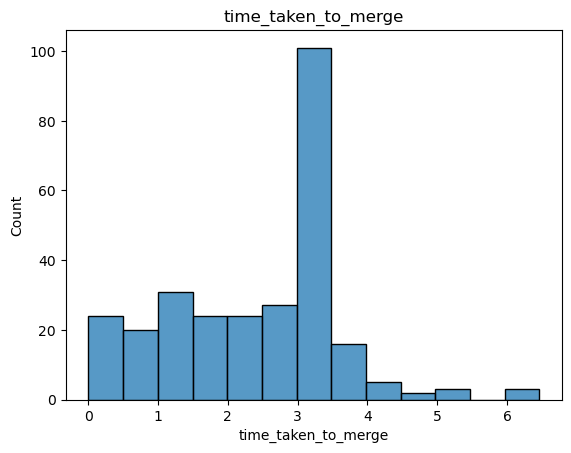

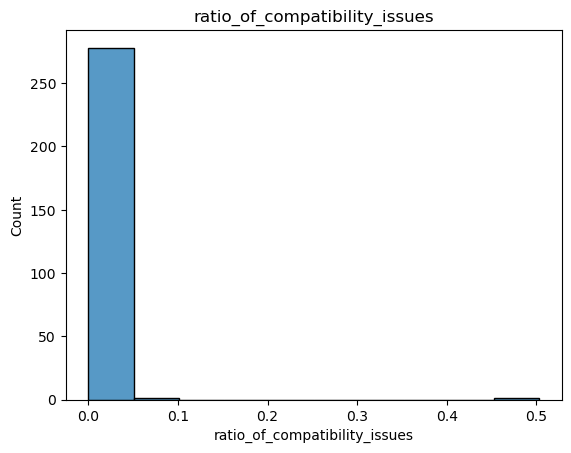

In [7]:
#Check for normality again
sns.histplot(df_logged['project_age'])
plt.title("Distribution of project_age")
plt.show()

sns.histplot(df_logged['project_size'])
plt.title("Distribution of project_size")
plt.show()

sns.histplot(df_logged['total_forks_count'])
plt.title("Distribution of total_forks_count")
plt.show()

sns.histplot(df_logged['contributed_back_forks_count'])
plt.title("contributed_back_forks_count")
plt.show()

sns.histplot(df_logged['hard_forks_count'])
plt.title("hard_forks_count")
plt.show()

sns.histplot(df_logged['inactive_forks_count'])
plt.title("inactive_forks_count")
plt.show()

sns.histplot(df_logged['merged_commits_count'])
plt.title("merged_commits_count")
plt.show()

sns.histplot(df_logged['not_merged_commits_count'])
plt.title("not_merged_commits_count")
plt.show()

sns.histplot(df_logged['not_contributed_back_commits_count'])
plt.title("not_contributed_back_commits_count")
plt.show()

sns.histplot(df_logged['time_taken_to_merge'])
plt.title("time_taken_to_merge")
plt.show()

sns.histplot(df_logged['ratio_of_compatibility_issues'])
plt.title("ratio_of_compatibility_issues")
plt.show()

In [8]:
print(df_logged.columns)

Index(['inactive_forks_count', 'is_sustaining', 'project_age', 'project_size',
       'total_forks_count', 'avg_annual_forks_growth_rate',
       'contributed_back_forks_count', 'hard_forks_count',
       'merged_commits_count', 'not_merged_commits_count',
       'not_contributed_back_commits_count',
       'avg_annual_merged_commits_growth_rate',
       'avg_annual_not_merged_commits_growth_rate',
       'avg_annual_not_contributed_back_commits_growth_rate',
       'time_taken_to_merge', 'ratio_of_compatibility_issues'],
      dtype='object')


In [9]:
#Do a pearson's correlation analysis and print the results
from scipy.stats import pearsonr

correlation_results = []

for col in df_logged.columns:
        if col != "is_sustaining":
            corr, p_value = pearsonr(df_logged[col], df_logged["is_sustaining"])
            correlation_results.append((col, "is_sustaining", corr, p_value))

for col1, col2, corr, p_value in correlation_results:
    print(f"Correlation between {col1} and {col2}: {corr}, p-value: {p_value}")

Correlation between inactive_forks_count and is_sustaining: 0.21250820968292972, p-value: 0.0003422520255742419
Correlation between project_age and is_sustaining: -0.1914326967611273, p-value: 0.0012874103151331358
Correlation between project_size and is_sustaining: 0.37726252202952304, p-value: 6.694385416739673e-11
Correlation between total_forks_count and is_sustaining: 0.5605558939829994, p-value: 1.435553157517461e-24
Correlation between avg_annual_forks_growth_rate and is_sustaining: 0.48204114248998187, p-value: 1.0667895443715572e-17
Correlation between contributed_back_forks_count and is_sustaining: 0.5736271397902816, p-value: 6.728110148536473e-26
Correlation between hard_forks_count and is_sustaining: 0.5571697970218845, p-value: 3.1033810917607643e-24
Correlation between merged_commits_count and is_sustaining: 0.5477401333207217, p-value: 2.5373055875425187e-23
Correlation between not_merged_commits_count and is_sustaining: 0.4777605598103639, p-value: 2.259803857611633e-1

In [10]:
#exclude features with a correlation lower than 0.2
df_logged_CDA = df_logged.drop(columns = ["inactive_forks_count", "project_age", "project_size", "time_taken_to_merge", "ratio_of_compatibility_issues"])
print(df_logged_CDA)

     is_sustaining  total_forks_count  avg_annual_forks_growth_rate  \
0                1          10.159253                     -0.096791   
1                1          10.049404                      0.018223   
2                1           9.811263                     -0.046718   
3                1           9.567105                      0.294218   
4                1           9.533438                      2.041317   
..             ...                ...                           ...   
275              0           1.609438                     -0.693147   
276              0           1.945910                     -0.405465   
277              0           1.609438                     -0.693147   
278              0           1.386294                     -0.336472   
279              0           1.386294                     -0.336472   

     contributed_back_forks_count  hard_forks_count  merged_commits_count  \
0                        7.523481          6.100319             10.032

In [11]:
save_path = "data/df_logged_CDA.csv"
df_logged_CDA.to_csv(save_path, index=False)